# Getting Started: PyProcar's `dosplot` Function

This tutorial provides a comprehensive introduction to plotting density of states (DOS) using PyProcar's `dosplot` function. You'll learn about all the main arguments, visualization modes, caching options, and plotting configurations.

## What You'll Learn

- **Core `dosplot` arguments** and their purposes
- **Different visualization modes** for DOS analysis
- **Caching functionality** to speed up repeated plotting
- **Plotting configurations** for customizing appearance
- **Best practices** for different analysis scenarios

## Prerequisites

- Basic understanding of electronic density of states
- PyProcar installed in your environment
- VASP calculation data (we'll use SrVO3 example data)

## Overview of `dosplot` Function

The `dosplot` function is PyProcar's main tool for density of states visualization. Its basic syntax is:

```python
pyprocar.dosplot(
    code='vasp',           # DFT code used
    dirname='.',           # Directory with calculation files
    mode='plain',          # Visualization mode
    fermi=None,           # Fermi energy
    # ... many other options
)
```

## 1. Setup and Data Loading

Let's start by importing PyProcar and loading example data. We'll use SrVO3 band structure data from a VASP calculation to demonstrate all the features.

In [1]:
# Import required libraries
from pathlib import Path
import pyprocar

CURRENT_DIR = Path(".").resolve()
REL_PATH = "data/examples/dos/non-spin-polarized"
pyprocar.download_from_hf(relpath=REL_PATH, output_path=CURRENT_DIR)
DATA_DIR = CURRENT_DIR / REL_PATH
print(f"Data downloaded to: {DATA_DIR}")

non-spin-polarized.zip:   0%|          | 0.00/5.64M [00:00<?, ?B/s]

Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\01-dos\data\examples\01-dos\non-spin-polarized


c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lllang\.cache\huggingface\hub\datasets--lllangWV--pyprocar_test_data. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


## 2. Core Arguments of `dosplot`

Before exploring different modes, let's understand the essential arguments of the `dosplot` function:

### Essential Arguments

| Argument | Type | Description | Example |
|----------|------|-------------|---------|
| `code` | str | DFT software used | `'vasp'`, `'qe'`, `'abinit'` |
| `dirname` | str | Path to calculation files | `'.'`, `'/path/to/data'` |
| `mode` | str | Visualization mode | `'plain'`, `'parametric'`, `'stack'`, `'overlay'` |
| `fermi` | float | Fermi energy (eV) | `5.599` |

### Optional Arguments

| Argument | Type | Description | Default |
|----------|------|-------------|---------|
| `atoms` | list | Atom indices for projection | `None` |
| `orbitals` | list | Orbital indices for projection | `None` |
| `spins` | list | Spin channels | `None` |
| `elimit` | list | Energy range [min, max] | `None` |
| `dos_limit` | list | DOS range [min, max] | `None` |
| `savefig` | str | Save plot filename | `None` |
| `orientation` | str | Plot orientation | `'horizontal'` |



## 3. Basic Usage - Plain Mode

The **plain mode** is the simplest way to visualize density of states. It shows the total DOS as a clean line without projections.

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

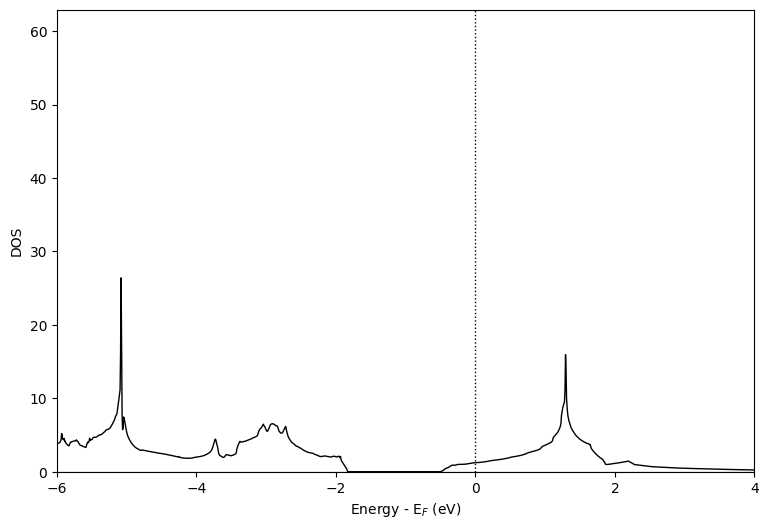

✅ Basic DOS plot created with essential arguments only


In [3]:
# Basic dosplot usage - showing essential arguments
pyprocar.dosplot(
    code="vasp",           # Required: DFT software used
    dirname=DATA_DIR,      # Required: Directory with calculation files  
    mode="plain",          # Visualization mode
    fermi=5.3017,          # Fermi energy in eV (shifts energy reference)
    elimit=[-6, 4],        # Energy range around Fermi level
)

print("✅ Basic DOS plot created with essential arguments only")

## 4. Visualization Modes Overview

PyProcar offers several visualization modes for different DOS analysis needs:

| Mode | Purpose | Key Arguments | Use Case |
|------|---------|---------------|----------|
| `'plain'` | Total DOS only | None extra | Publication plots, general overview |
| `'parametric'` | Projected DOS with color/line weight | `atoms`, `orbitals`, `spins` | Analyzing specific contributions |
| `'parametric_line'` | Projected DOS as lines | `atoms`, `orbitals`, `spins` | Clean orbital/atomic contributions |
| `'stack'` | Stacked area plot | `items` | Component contributions |
| `'stack_species'` | Stack by atomic species | `orbitals`, `spins` | Multi-element systems |
| `'stack_orbitals'` | Stack by orbital type | `atoms`, `spins` | Orbital analysis |
| `'overlay'` | Multiple DOS overlays | `items` | Comparing projections |
| `'overlay_species'` | Overlay by species | `orbitals`, `spins` | Species comparison |
| `'overlay_orbitals'` | Overlay by orbitals | `atoms`, `spins` | Orbital comparison |


## 5. Parametric Mode - Projected Density of States

**Parametric mode** shows atomic/orbital contributions through line weight or color intensity in the DOS.

### Orbital Indexing Reference
- **s**: 0
- **p**: 1, 2, 3 (px, py, pz)  
- **d**: 4, 5, 6, 7, 8 (d orbitals)
- **f**: 9, 10, 11, 12, 13, 14, 15 (f orbitals)

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

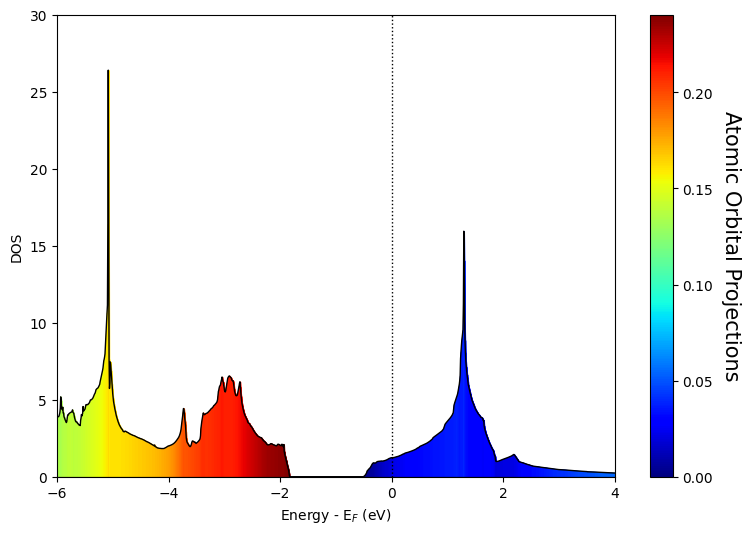

📊 Parametric mode: Line weight/color shows p-orbital contribution strength
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communica

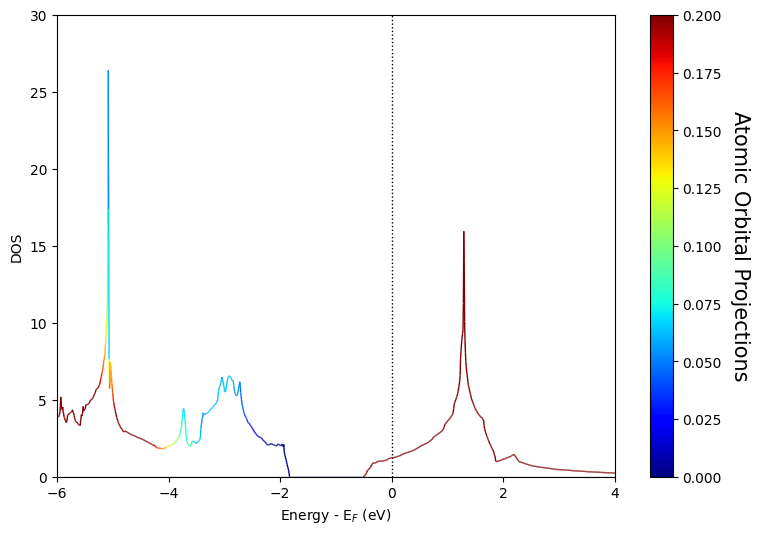

📊 Parametric line mode: Shows d-orbital contributions as distinct lines


In [6]:
# Parametric mode requires projection arguments
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="parametric",
    fermi=5.3017,
    elimit=[-6, 4],
    dos_limit=[0,30],
    atoms=[2,3,4],                # Project onto the Oxygen atoms
    orbitals=[1,2,3],             # p orbitals (indices 1-3) 
)

print("📊 Parametric mode: Line weight/color shows p-orbital contribution strength")

# Parametric line mode for cleaner visualization
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="parametric_line",
    fermi=5.3017,
    elimit=[-6, 4],
    dos_limit=[0,30],
    atoms=[1],                    # Project onto the V atom
    orbitals=[4,5,6,7,8],         # d orbitals (indices 4-8) 
)

print("📊 Parametric line mode: Shows d-orbital contributions as distinct lines")

## 6. Stack Modes - Component Analysis

Stack modes are particularly useful for DOS analysis as they show how different components contribute to the total DOS. The area of each component is proportional to its contribution.

### Stack Mode Benefits
1. **Visual composition**: See exactly how much each component contributes
2. **Area proportional**: Stack height = contribution magnitude
3. **Total preservation**: Stack top = total DOS

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

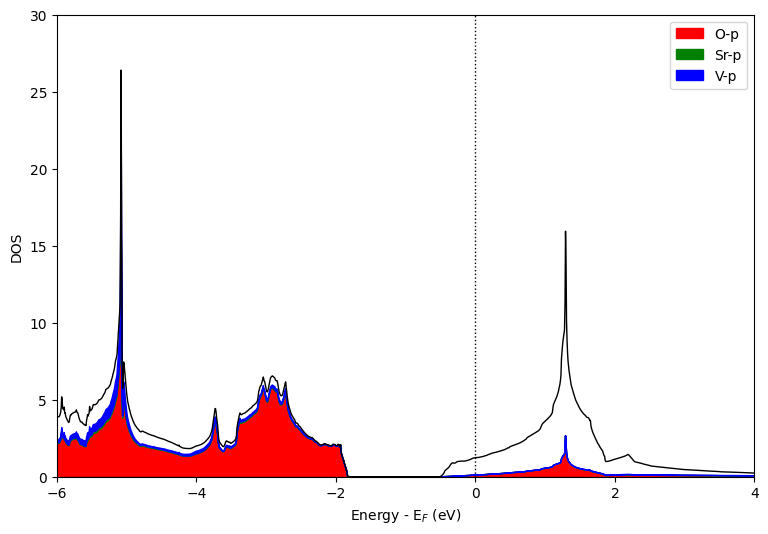

📚 Stack by species: Shows how each element contributes to p-orbital DOS
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communicatio

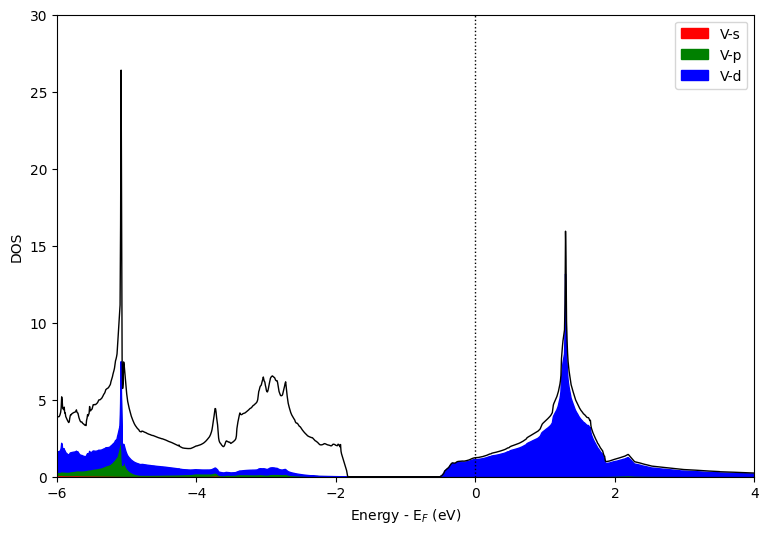

🧩 Stack by orbitals: Shows s, p, d orbital contributions from V atom


In [7]:

# Stack by species - shows contribution of each element
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="stack_species",
    fermi=5.3017,
    elimit=[-6, 4],
    dos_limit=[0,30],
    orbitals=[1,2,3],  # Focus on p orbitals
)

print("📚 Stack by species: Shows how each element contributes to p-orbital DOS")

# Stack by orbitals - shows contribution of each orbital type
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="stack_orbitals",
    fermi=5.3017,
    elimit=[-6, 4],
    dos_limit=[0,30],
    atoms=[1],  # Focus on V atom

)

print("🧩 Stack by orbitals: Shows s, p, d orbital contributions from V atom")

## 7. Overlay Modes - Comparing Multiple Contributions

Overlay modes allow you to compare different contributions on the same plot. Each contribution gets a different color and appears in the legend, making it easy to identify which peaks correspond to which components.

### Available Overlay Modes
- **`overlay_species`**: Compare different atomic species
- **`overlay_orbitals`**: Compare different orbital types  
- **`overlay`**: Custom user-defined comparisons using items dictionary

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

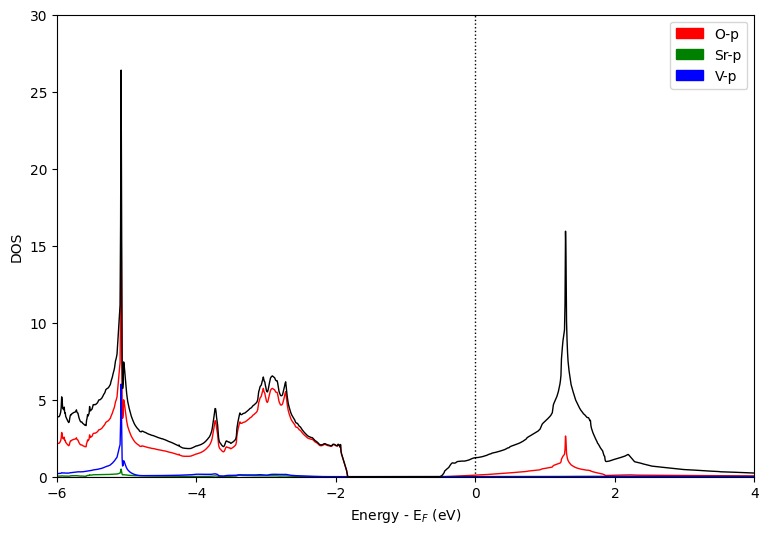

🔴🟢🔵 Overlay species: Each element gets a unique color
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (20

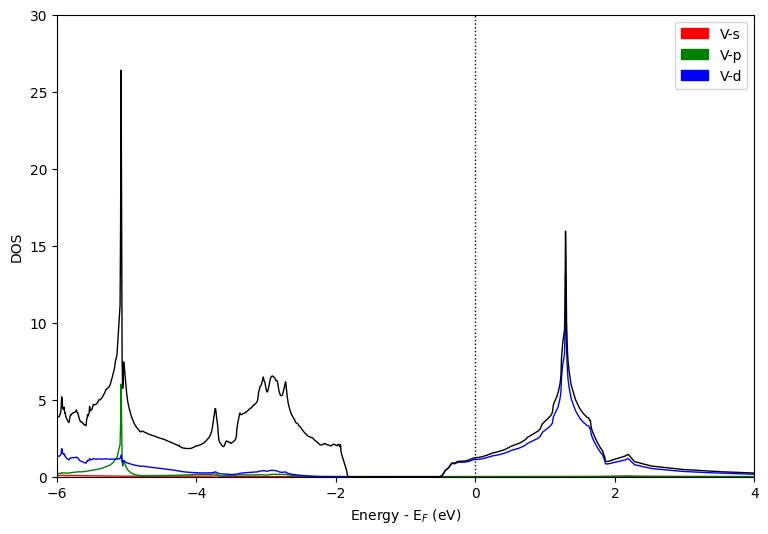

🟡🟠🟣 Overlay orbitals: Each orbital type gets a unique color
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 1090

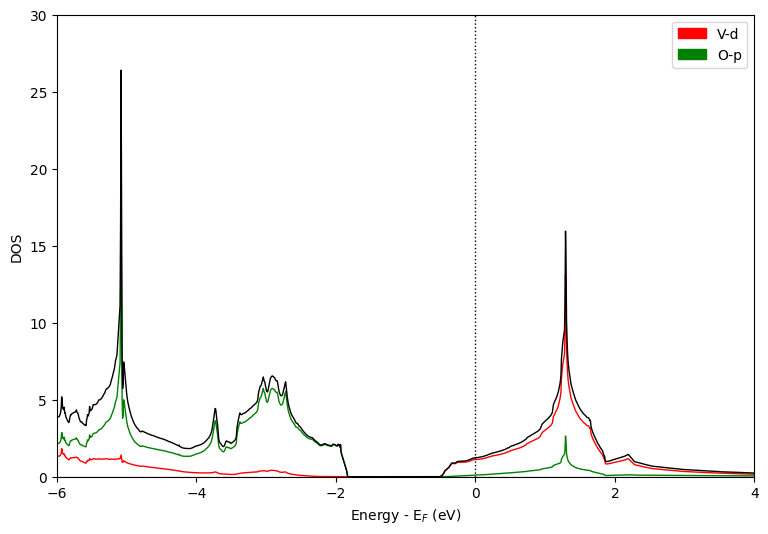

🎨 Overlay mode: Custom groups with unique colors and legend


In [10]:

# overlay_species: Compare different atomic species
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR, 
    mode="overlay_species",
    fermi=5.3017,
    elimit=[-6, 4],
    dos_limit=[0,30],
    orbitals=[1,2,3],  # p orbitals
)

print("🔴🟢🔵 Overlay species: Each element gets a unique color")

# overlay_orbitals: Compare different orbital types
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR, 
    mode="overlay_orbitals",
    fermi=5.3017,
    elimit=[-6, 4],
    dos_limit=[0,30],
    atoms=[1],  # V atom
)

print("🟡🟠🟣 Overlay orbitals: Each orbital type gets a unique color")

# overlay: Custom comparisons using the items argument
items = {
    "V": [1,2,3],        # s orbital
    "O": [1,2,3],   # p orbitals  
    "V": [4,5,6,7,8] # d orbitals
}


pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="overlay", 
    fermi=5.3017,
    elimit=[-6, 4],
    dos_limit=[0,30],
    items=items,  # Custom groupings
)

print("🎨 Overlay mode: Custom groups with unique colors and legend")

## 8. DOS Normalization - Scaling for Comparison

DOS normalization is crucial when comparing different systems or when you want to focus on the shape rather than absolute magnitude of the DOS. PyProcar provides two normalization modes through the `normalize_dos_mode` parameter.

### Normalization Modes

| Mode | Description | Use Case |
|------|-------------|----------|
| `'max'` | Normalizes by maximum DOS value | Compare DOS shapes, focus on relative peaks |
| `'integral'` | Normalizes by integral (total electrons) | Compare per-electron contributions |

### When to Use Normalization
- **Comparing different systems**: Different supercell sizes, different materials
- **Focus on DOS shape**: When absolute magnitude is less important than peak positions
- **Per-electron analysis**: Understanding contribution per electron rather than per unit cell


Max normalization - DOS scaled to maximum value of 1:
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (20

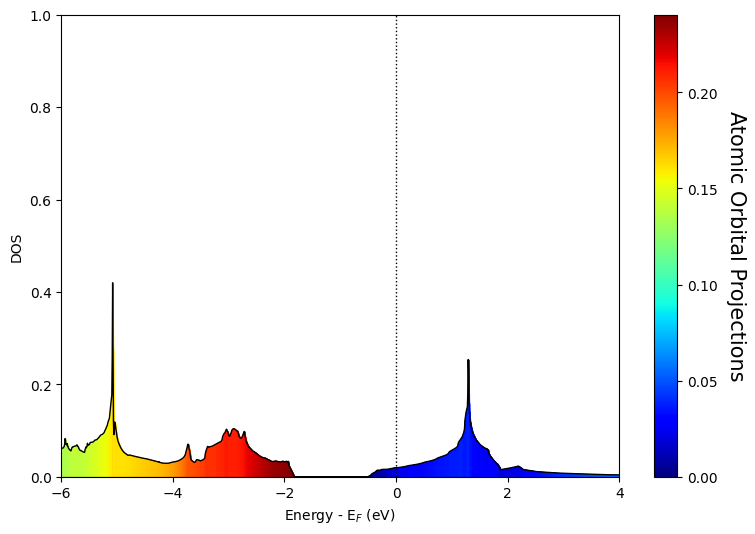

🔝 Max normalization: Each species DOS scaled to its own maximum
\nIntegral normalization - DOS scaled by number of electrons:
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainabil

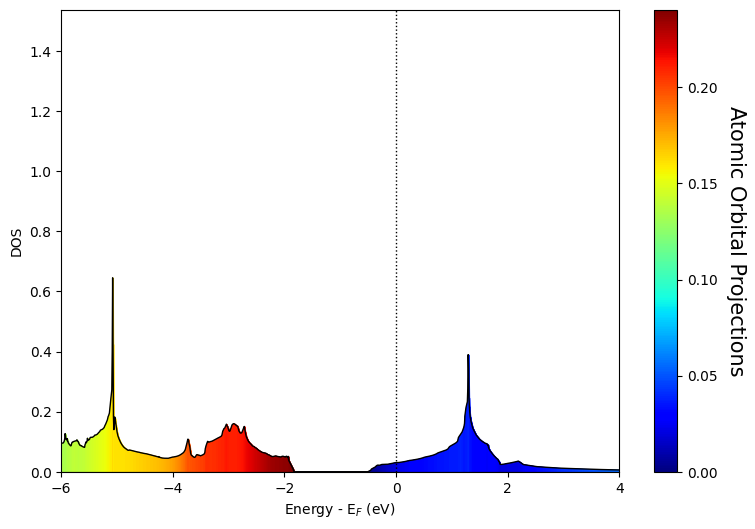

∫ Integral normalization: Shows contribution per electron


In [20]:
# Example 1: Max normalization - scales DOS so maximum value = 1
print("Max normalization - DOS scaled to maximum value of 1:")
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="parametric",
    fermi=5.3017,
    elimit=[-6, 4],
    atoms=[2,3,4],
    orbitals=[1,2,3],  # p orbitals
    normalize_dos_mode="max",  # Normalize by maximum value
)

print("🔝 Max normalization: Each species DOS scaled to its own maximum")

# Example 2: Integral normalization - scales DOS by total number of electrons
print("\\nIntegral normalization - DOS scaled by number of electrons:")
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="parametric",
    fermi=5.3017,
    elimit=[-6, 4],
    atoms=[2,3,4],
    orbitals=[1,2,3],  # p orbitals
    normalize_dos_mode="integral",  # Normalize by integral (electron count)
)

print("∫ Integral normalization: Shows contribution per electron")


## 9. Plotting Configurations - Customizing Appearance

PyProcar provides extensive options to customize DOS plot appearance through various configuration arguments.

### Key Configuration Arguments

| Category | Arguments | Description |
|----------|-----------|-------------|
| **Labels** | `labels`, `x_label`, `y_label` | Plot labels and axis titles |
| **Energy** | `fermi`, `elimit`, `dos_limit` | Energy reference and plot ranges |
| **Colors** | `colors`, `spin_colors` | Line colors and spin differentiation |
| **Lines** | `linewidth`, `linestyle` | Line appearance |
| **Layout** | `orientation`, `figure_size` | Plot orientation and dimensions |
| **Output** | `savefig`, `dpi` | Save options |

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

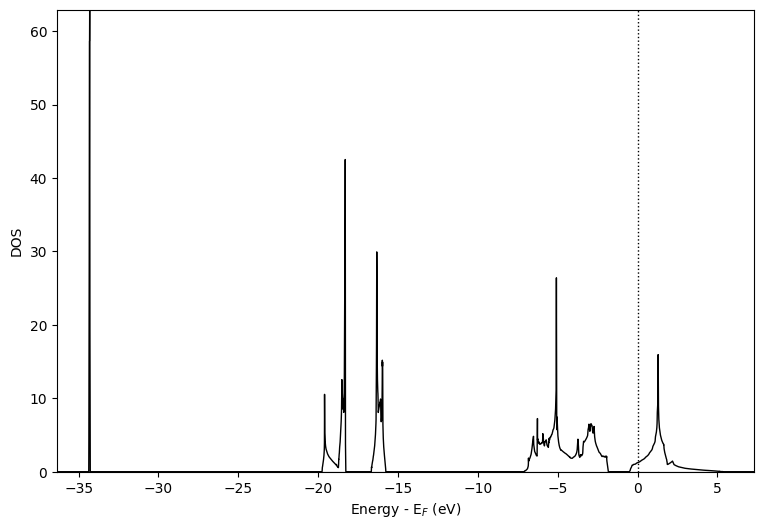

(<Figure size 900x600 with 1 Axes>,
 <Axes: xlabel='Energy - E$_F$ (eV)', ylabel='DOS'>)

In [11]:
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain", 
    fermi=5.3017,
    print_plot_opts=True
)

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

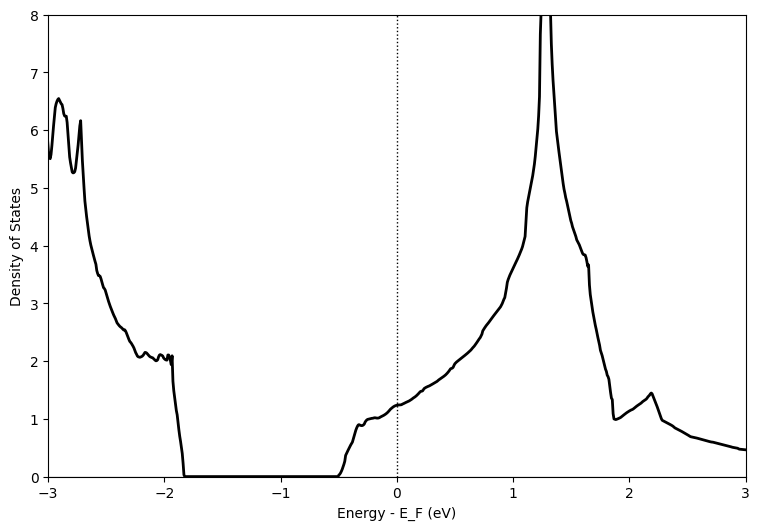

📊 Customized energy range, labels, and colors
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

De

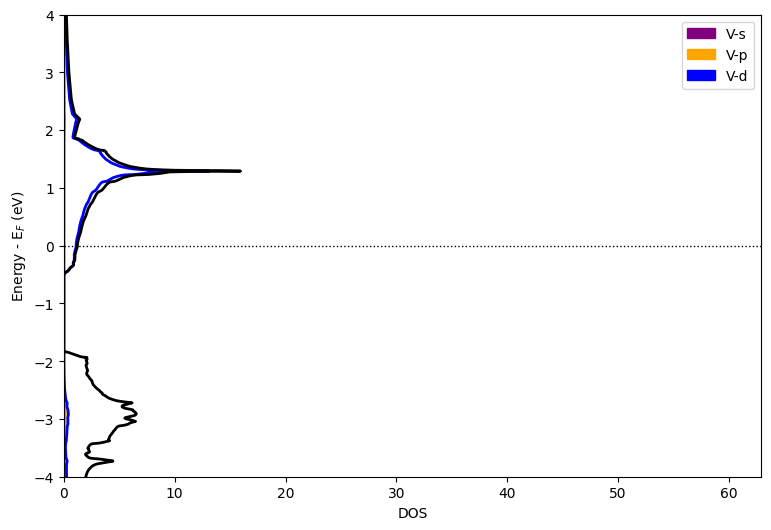

🔄 Vertical orientation with custom colors and line widths
🎨 Configuration options allow full customization of DOS plot appearance


In [16]:
# Example 1: Customizing energy range and labels
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain", 
    fermi=5.3017,
    elimit=[-3, 3],           # Energy range: -3 to +3 eV around Fermi
    dos_limit=[0, 8],         # DOS range
    x_label="Energy - E_F (eV)",
    y_label="Density of States",
    linewidth=[2]
)

print("📊 Customized energy range, labels, and colors")

# Example 2: Customizing orientation and colors for overlay plot
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="overlay_orbitals",
    fermi=5.3017,
    elimit=[-4, 4],
    atoms=[1],                # V atom
    orientation="vertical",   # Vertical orientation
    colors=["purple", "orange", "blue", "green"],
    linewidth=[2, 2, 2, 2],
)

print("🔄 Vertical orientation with custom colors and line widths")

print("🎨 Configuration options allow full customization of DOS plot appearance")

## 10. Caching and Performance

PyProcar automatically caches parsed DOS data to speed up repeated plotting with different parameters. This is especially useful when experimenting with different visualization options.

### How Caching Works
1. **First run**: PyProcar reads and parses DOS data, saves cache files
2. **Subsequent runs**: Loads cached data (much faster)
3. **Cache control**: Use `use_cache=True/False` to control caching


First run with caching (data will be parsed and cached):
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 

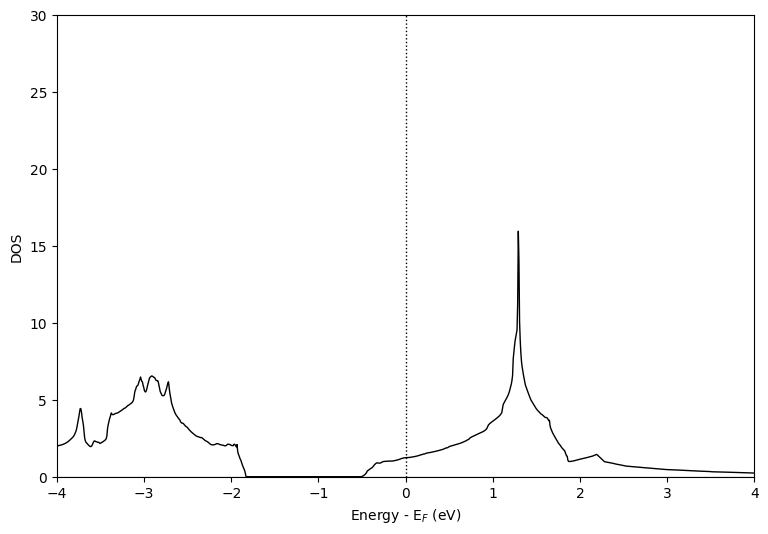

(<Figure size 900x600 with 1 Axes>,
 <Axes: xlabel='Energy - E$_F$ (eV)', ylabel='DOS'>)

In [17]:
# Demonstration of caching - first run parses data
print("First run with caching (data will be parsed and cached):")
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain",
    fermi=5.3017,
    elimit=[-4, 4],
    dos_limit=[0,30],
    use_cache=True,  # Enable caching (default)
)

## 11. Saving and Output Options

PyProcar provides several options for saving DOS plots and controlling output quality.

### Save Options

In [19]:
# Saving DOS plots with different formats and quality
pyprocar.dosplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain",
    fermi=5.3017,
    elimit=[-6, 4],
    savefig=DATA_DIR / "dos_plain.png",  # Save as PNG
    dpi=300
)

# Alternative: Save as vector format (better for publications)
pyprocar.dosplot(
    code="vasp", 
    dirname=DATA_DIR,
    mode="stack_species",
    fermi=5.3017,
    elimit=[-6, 4],
    orbitals=[1,2,3],
    savefig=DATA_DIR / "dos_stack.pdf",  # Vector format
    dpi=300,
)

print("💾 DOS plots saved as:")
print("   - dos_plain.png (300 DPI raster)")
print("   - dos_stack.pdf (vector format)")

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

<Figure size 900x600 with 0 Axes>

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

<Figure size 900x600 with 0 Axes>

💾 DOS plots saved as:
   - dos_plain.png (300 DPI raster)
   - dos_stack.pdf (vector format)


## Summary: Mastering `dosplot`

🎉 **Congratulations!** You've learned the complete `dosplot` function including:

### Core Concepts Covered
1. **Essential arguments**: `code`, `dirname`, `mode`, `fermi`
2. **Visualization modes**: `plain`, `parametric`, `stack_*`, `overlay_*`
3. **DOS normalization**: Scale DOS for comparison using `normalize_dos_mode`
4. **Caching**: Speed up repeated plotting with `use_cache=True`
5. **Configurations**: Customize appearance with colors, labels, limits
6. **Output options**: Save high-quality DOS plots for publications

### 💡 Key Takeaways

| Concept | Key Points |
|---------|------------|
| **Arguments** | Start with `code`, `dirname`, `mode`, `fermi` |
| **Modes** | Choose based on analysis goal (composition vs. comparison) |
| **Stacking** | Use stack modes to see component contributions |
| **Overlaying** | Use overlay modes to compare contributions |
| **Normalization** | Use `normalize_dos_mode='max'` or `'integral'` for comparison |
| **Caching** | Always use `use_cache=True` for efficiency |
| **Configuration** | Customize with `elimit`, `dos_limit`, `colors`, etc. |

### 🚀 Quick Reference

```python
# Basic total DOS
pyprocar.dosplot(code='vasp', dirname='.', mode='plain', fermi=E_F)

# Projected DOS with orbital contributions
pyprocar.dosplot(code='vasp', dirname='.', mode='parametric', 
                fermi=E_F, atoms=[0], orbitals=[4,5,6,7,8])

# Stack by species
pyprocar.dosplot(code='vasp', dirname='.', mode='stack_species',
                fermi=E_F, orbitals=[1,2,3])

# Overlay comparison
pyprocar.dosplot(code='vasp', dirname='.', mode='overlay_orbitals',
                fermi=E_F, atoms=[0])

# Normalized DOS for comparison
pyprocar.dosplot(code='vasp', dirname='.', mode='overlay_orbitals',
                fermi=E_F, atoms=[0], normalize_dos_mode='max')
```

